# Sooty Mould Effect on the chlorophyll content
## Relating Spectral Data
### Author: Semakula Abdumajidhu, Dr. Ernest Mwebaze, Pius Mugagga, Dr. Joyce Nabende

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
import os

In [79]:
#Creating data path for  both Soot Mold Damage(SMD) and Health (HLTS) data
smd_path = ['data/SMD/R/b']
hlt_path = ['data/HLTS/R/b']

#Joining data path to actual csv files
smd_thread = os.sep.join(smd_path + ['A7SMD1Rm1b.csv'])
smd_thread1 = os.sep.join(smd_path + ['A7SMD1Rm2b.csv'])
smd_thread2 = os.sep.join(smd_path + ['A7SMD1Rm3b.csv'])
smd_thread3 = os.sep.join(smd_path + ['A7SMD1Rm4b.csv'])
smd_thread4 = os.sep.join(smd_path + ['A7SMD1Rm5b.csv'])
smd_thread5 = os.sep.join(smd_path + ['A7SMD2Rm1b.csv'])
hlt_thread = os.sep.join(hlt_path + ['A7HLTS1Rm1b.csv'])

#Reading data with pandas. Actual data with headlines and rows
smd_data = pd.read_csv(smd_thread, error_bad_lines=False, skiprows=range(3649,3659))
smd_data1 = pd.read_csv(smd_thread1, error_bad_lines=False, skiprows=range(3649,3659))
smd_data2 = pd.read_csv(smd_thread2, error_bad_lines=False,skiprows=range(3649, 3659))
smd_data3 = pd.read_csv(smd_thread3, error_bad_lines=False, skiprows=range(3649,3659))
smd_data4 = pd.read_csv(smd_thread4, error_bad_lines=False, skiprows=range(3649,3659))
smd_data5 = pd.read_csv(smd_thread5, error_bad_lines=False, skiprows=range(3649,3659))
hlt_data = pd.read_csv(hlt_thread, error_bad_lines=False, skiprows=range(3655,3664))

#Reading data with pandas. Droping headlines and all string lines.
smd_datap = pd.read_csv(smd_thread, error_bad_lines=False,sep=',', header=None, skiprows=9,  names=['layers', 'color', 'specimen'])# Skipping badlines, headlines and skipping any text rows
hlt_datap = pd.read_csv(hlt_thread, error_bad_lines=False,sep=',', header=None, skiprows=9,  names=['layers', 'color', 'specimen'])# Skipping badlines, headlines and skipping any text rows

b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'
b'Skipping line 4: expected 3 fields, saw 4\nSkipping line 5: expected 3 fields, saw 4\n'


In [80]:
smd_data

,Layer Title,Color,Specimen ID
0,Layer 1,Blue,Untitled
1,Wavelength,Raw Spectrometer Data,Calibrated and Averaged Data
2,345.59109,1728.485625,100%
3,345.807512991978,1617.8953125,100%
4,346.023924626503,2896.23740625,100%
5,346.240324901463,3544.6243125,100%
6,346.456713814747,4153.69021875,100%
7,346.673091364243,4709.5089375,100%
8,346.889457547838,4683.2949375,0%
9,347.10581236342,4705.82259375,0%


In [65]:
#hlt_data

In [66]:
#ndf.dtypes.value_counts()
#sooty mold data
actual_data = pd.concat([smd_data.iloc[20:3600]])
small_data = pd.concat([smd_data.iloc[750:900]])

x= small_data.iloc[:,0] # pick out the first column
y= small_data.iloc[:,-2] #take out the second column
y_list =[]
x_list =[]
#some preprocessing of the data
for y_data in y:
    y_list  += [] if y_data =='' else [float(y_data)] #add contents to an array while removing any null values returned from the re.split 
y_data= np.asarray(y_list)

for x_data in x:
    x_list  += [] if x_data =='' else [float(x_data)] #add contents to an array while removing any null values returned from the re.split 
x_data= np.asarray(x_list) 


In [67]:
#ndf.dtypes.tail()
#ndf.color.value_counts()
#sns.jointplot(x='layers', y='color',data=small_data, size=4)

In [68]:
#sns.jointplot(x_data, y_data).set_axis_labels("Wavelength", "Raw Spectral Data")

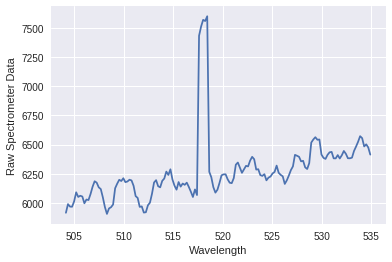

In [69]:
plt.plot(x_list, y_list)
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
plt.show()

In [70]:
x1= actual_data.iloc[:,0] # pick out the first column
y1= actual_data.iloc[:,-2] #take out the second column
y_list1 =[]
x_list1 =[]
for y_data1 in y1:
    y_list1  += [] if y_data1 =='' else [float(y_data1)] #add contents to an array while removing any null values returned from the re.split 
y_data1= np.asarray(y_list1)

for x_data1 in x1:
    x_list1  += [] if x_data1 =='' else [float(x_data1)] #add contents to an array while removing any null values returned from the re.split 
x_data1= np.asarray(x_list) 

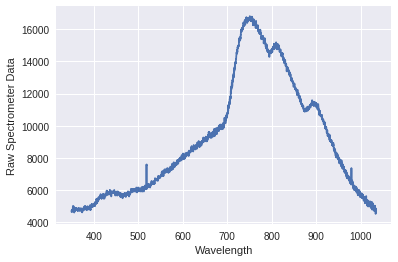

In [71]:
plt.plot(x_list1, y_list1)
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
plt.show()

In [72]:
actual_data2 = pd.concat([hlt_data.iloc[20:3600]])
actual_datah = pd.concat([hlt_data.iloc[20:3600]])
actual_datah3 = pd.concat([smd_data.iloc[20:3600]])
actual_datah4 = pd.concat([smd_data1.iloc[20:3600]])
actual_datah5 = pd.concat([smd_data2.iloc[20:3600]])
actual_datah6 = pd.concat([smd_data3.iloc[20:3600]])
actual_datah7 = pd.concat([smd_data4.iloc[20:3600]])
actual_datah8 = pd.concat([smd_data5.iloc[20:3600]])
small_datah = pd.concat([hlt_data.iloc[750:900]])

x2= actual_datah.iloc[:,0] # pick out the first column
y2= actual_datah.iloc[:,-2] #take out the second column
y_list2 =[]
x_list2 =[]
for y_data2 in y2:
    y_list2  += [] if y_data2 =='' else [float(y_data2)] #add contents to an array while removing any null values returned from the re.split 
y_data2= np.asarray(y_list2)

for x_data2 in x2:
    x_list2  += [] if x_data2 =='' else [float(x_data2)] #add contents to an array while removing any null values returned from the re.split 
x_data2= np.asarray(x_list2)

x3= actual_datah3.iloc[:,0] # pick out the first column
y3= actual_datah3.iloc[:,-2] #take out the second column
y_list3 =[]
x_list3 =[]
for y_data3 in y3:
    y_list3  += [] if y_data3 =='' else [float(y_data3)] #add contents to an array while removing any null values returned from the re.split 
y_data3= np.asarray(y_list3)

for x_data3 in x3:
    x_list3  += [] if x_data3 =='' else [float(x_data3)] #add contents to an array while removing any null values returned from the re.split 
x_data3= np.asarray(x_list3) 

x4= actual_datah4.iloc[:,0] # pick out the first column
y4= actual_datah4.iloc[:,-2] #take out the second column
y_list4 =[]
x_list4 =[]
for y_data4 in y4:
    y_list4  += [] if y_data4 =='' else [float(y_data4)] #add contents to an array while removing any null values returned from the re.split 
y_data4= np.asarray(y_list4)

for x_data4 in x4:
    x_list4  += [] if x_data4 =='' else [float(x_data4)] #add contents to an array while removing any null values returned from the re.split 
x_data4= np.asarray(x_list4) 

x5= actual_datah5.iloc[:,0] # pick out the first column
y5= actual_datah5.iloc[:,-2] #take out the second column
y_list5 =[]
x_list5 =[]
for y_data5 in y5:
    y_list5  += [] if y_data5 =='' else [float(y_data5)] #add contents to an array while removing any null values returned from the re.split 
y_data5= np.asarray(y_list5)

for x_data5 in x5:
    x_list5  += [] if x_data5 =='' else [float(x_data5)] #add contents to an array while removing any null values returned from the re.split 
x_data5= np.asarray(x_list5) 

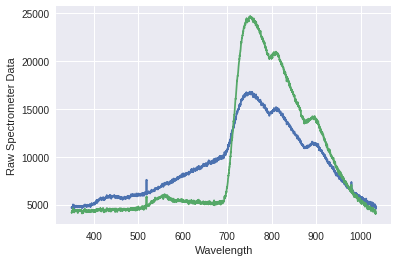

In [73]:
# One on one Ploting, comparing and Analysing sooty mold data with healthy.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
ax.plot(x_list1, y_list1)
ax.plot(x_list2, y_list2)
plt.show()

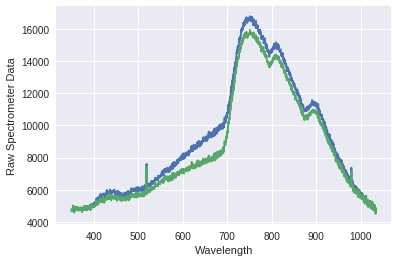

In [74]:
# One on one Ploting, comparing and Analysing sooty mold data with healthy.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
ax.plot(x_list1, y_list1)
ax.plot(x_list4, y_list4)
plt.show()

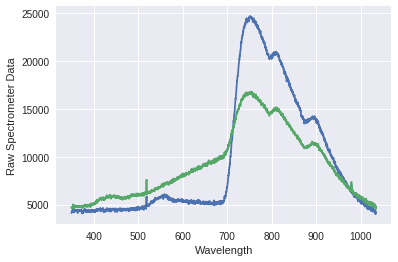

In [75]:
# One on one Ploting, comparing and Analysing sooty mold data with healthy.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
ax.plot(x_list2, y_list2, label="test1")
ax.plot(x_list3, y_list3, label="testi")
plt.show()


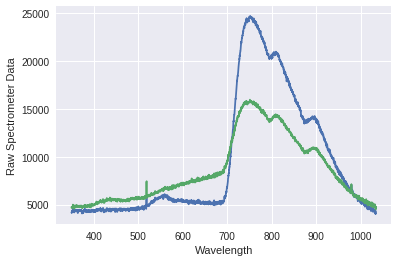

In [76]:
# One on one Ploting, comparing and Analysing sooty mold data with healthy.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
ax.plot(x_list2, y_list2)
ax.plot(x_list4, y_list4)
plt.show()


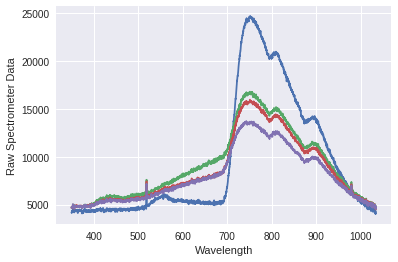

In [77]:
# Ploting, comparing and Analysing sooty mold data from 3 different files with one healthy data.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
ax.plot(x_list2, y_list2)
ax.plot(x_list3, y_list3)
ax.plot(x_list4, y_list4)
ax.plot(x_list5, y_list5)

plt.show()


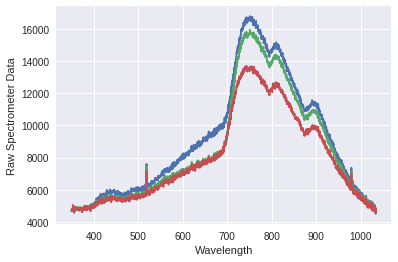

In [78]:
# Ploting, comparing and Analysing sooty mold data from 3 different files.
fig,ax = plt.subplots()
plt.ylabel('Raw Spectrometer Data')
plt.xlabel('Wavelength')
#ax.plot(x_list2, y_list2)
ax.plot(x_list3, y_list3)
ax.plot(x_list4, y_list4)
ax.plot(x_list5, y_list5)

plt.show()